# Machine learning assignment 
##### Data set: Mammographic Mass Data Set
##### Aim: Discrimination of benign and malignant mammographic masses based on BI-RADS attributes and the patient's age.   
##### Observe: 961
##### Variables: 
  1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive!) 
  2. Age: patient's age in years (integer) 
  3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal) 
  4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal) 
  5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal) 
  6. Severity: benign=0 or malignant=1 (binominal, goal field!)


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 

In [3]:
# Data Description 
cols_name=['BI-RADS','Age','Shape','Margin','Density','Severity']
route='http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data'
Mammo_Data =pd.read_csv(route,header=None,names=cols_name)
Mammo_Data = Mammo_Data.replace('?', np.nan)
Mammo_Data.head()


,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,NaN,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,NaN,1


In [4]:
Mammo_Data.shape

(961, 6)

In [5]:
# Missing values 
Mammo_Data.isnull().sum()

BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

In [6]:
Mammo_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     959 non-null object
Age         956 non-null object
Shape       930 non-null object
Margin      913 non-null object
Density     885 non-null object
Severity    961 non-null int64
dtypes: int64(1), object(5)
memory usage: 45.1+ KB


In [7]:
Mammo_Data['BI-RADS'].replace(
    to_replace=['55'],
    value='5',
    inplace=True)
Mammo_Data['BI-RADS'].value_counts(dropna=False)

4      547
5      346
3       36
2       14
6       11
0        5
NaN      2
Name: BI-RADS, dtype: int64

### Complete case ( 961-> 830 )

In [8]:
# Dropna_complete case
Mammo_Data_drop= Mammo_Data.dropna()
Mammo_Data_drop.shape

(830, 6)

In [9]:
Mammo_Data_drop.loc[:,:]=Mammo_Data_drop.loc[:,:].astype(int)

/Users/richardtsai/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
Mammo_Data_drop.describe(include='all')

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.333735,55.781928,2.781928,2.813253,2.915663,0.485542
std,0.688134,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [11]:
Mammo_Data_drop['BI-RADS'].value_counts(dropna=False)

4    468
5    317
3     24
6      9
2      7
0      5
Name: BI-RADS, dtype: int64

In [12]:
Mammo_Data_drop['Shape'].value_counts(dropna=False)

4    379
1    190
2    180
3     81
Name: Shape, dtype: int64

In [13]:
Mammo_Data_drop['Margin'].value_counts(dropna=False)

1    320
4    254
5    127
3    106
2     23
Name: Margin, dtype: int64

In [14]:
Mammo_Data_drop['Density'].value_counts(dropna=False)

3    755
2     56
1     11
4      8
Name: Density, dtype: int64

### Split complete  dataset

In [15]:
#split data set for complete case
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X = Mammo_Data_drop.iloc[:, 1:5].values
y = Mammo_Data_drop.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
# Bringing features onto the same scale
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


/Users/richardtsai/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Data imputation

In [17]:
Mammo_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     959 non-null object
Age         956 non-null object
Shape       930 non-null object
Margin      913 non-null object
Density     885 non-null object
Severity    961 non-null int64
dtypes: int64(1), object(5)
memory usage: 45.1+ KB


In [18]:
# Impute missing data 
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='median', axis=0)
imr = imr.fit(Mammo_Data)
imputed_data = imr.transform(Mammo_Data.values)
imputed_data

array([[  5.,  67.,   3.,   5.,   3.,   1.],
       [  4.,  43.,   1.,   1.,   3.,   1.],
       [  5.,  58.,   4.,   5.,   3.,   1.],
       ..., 
       [  4.,  64.,   4.,   5.,   3.,   0.],
       [  5.,  66.,   4.,   5.,   3.,   1.],
       [  4.,  62.,   3.,   3.,   3.,   0.]])

In [19]:
#Initial dataframe
Mammo_Data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,NaN,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,NaN,1


In [20]:
# impute dataframe 
imputed_df=pd.DataFrame(imputed_data,columns=cols_name,dtype=int)
imputed_df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,3,1


In [21]:
imputed_df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,4.295525,55.495317,2.730489,2.806452,2.917794,0.463059
std,0.705684,14.442783,1.223552,1.527525,0.365869,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


(array([ 516.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  445.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

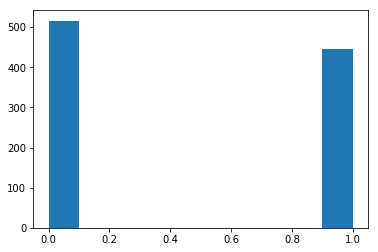

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py  # tools to communicate with Plotly's server

numpy_hist = plt.figure()

plt.hist(imputed_df['Severity'])


In [23]:
imputed_df['Severity'].value_counts()

0    516
1    445
Name: Severity, dtype: int64

In [24]:
# Checking impute data missing
imputed_df.isnull().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

# Sample imbalance
 In the outcome "severity" is inbalanced. Since this is a small sample size we will deal with the imbalanced data with oversampling method. 

### Split impute dataset

In [25]:
# split impute dataset
from sklearn.cross_validation import train_test_split
X_imp, y_imp = imputed_df.iloc[:, 1:5].values, imputed_df.iloc[:, -1].values # -1 indexing

from imblearn.over_sampling import RandomOverSampler
OS = RandomOverSampler()
osx, osy = OS.fit_sample(X_imp, y_imp)


In [27]:
X_imp_train, X_imp_test, Y_imp_train, Y_imp_test = train_test_split(osx, osy, test_size=0.3, random_state=0)


### Bringing features onto the same scale (impute dataset)

In [41]:
# Bringing features onto the same scale
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_imp_train_std = stdsc.fit_transform(X_imp_train)
X_imp_test_std = stdsc.transform(X_imp_test)


/Users/richardtsai/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



### Selecting meaningful features (complete dataset / SVM)
#### feature selection

In [42]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

[0.75342465753424659, 0.75342465753424659, 0.74657534246575341, 0.72602739726027399]


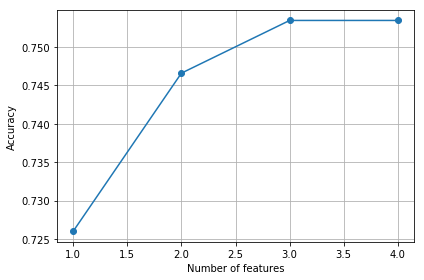

In [43]:
%matplotlib inline
from sklearn.svm import SVC
import matplotlib.pyplot as plt

svc = SVC(kernel='rbf', C=1, gamma=0.001)
#svc = SVC(kernel='linear', C=0.1)
# selecting features
sbs = SBS(svc, k_features=1)
sbs.fit(X_train_std , Y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
print(sbs.scores_)
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()


In [44]:
sbs.subsets_

[(0, 1, 2, 3), (0, 1, 2), (1, 2), (2,)]

In [45]:
#what are those features that yielded such a good performance
k5=list(sbs.subsets_[1])
k5

[0, 1, 2]

In [46]:
imputed_df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,3,1


In [47]:
feature_labels = imputed_df.columns[1:5]
feature_labels[k5]
# Birads and shape are imporant for complete case

Index(['Age', 'Shape', 'Margin'], dtype='object')

### Selecting meaningful features (imp std dataset / SVM)
#### Best age, Birads

[0.79558011049723754, 0.8066298342541437, 0.8066298342541437, 0.79558011049723754]


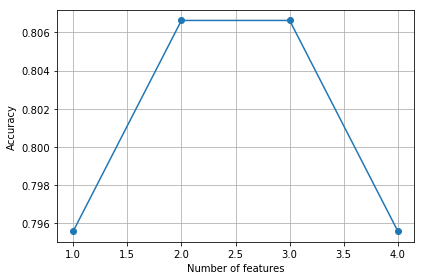

In [48]:
%matplotlib inline
from sklearn.svm import SVC
import matplotlib.pyplot as plt

svc = SVC(kernel='rbf', C=1, gamma=0.001)
#svc = SVC(kernel='linear', C=0.1)
# selecting features
sbs = SBS(svc, k_features=1)
sbs.fit(X_imp_train_std, Y_imp_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
print(sbs.scores_)
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [49]:
sbs.subsets_

[(0, 1, 2, 3), (0, 1, 2), (0, 2), (2,)]

In [50]:
#what are those features that yielded such a good performance
k5=list(sbs.subsets_[1])
k5

[0, 1, 2]

In [51]:
feature_labels = imputed_df.columns[1:5]
feature_labels[k5]
# Birads and shape are imporant for complete case

Index(['Age', 'Shape', 'Margin'], dtype='object')

### Explore relation  (Imputed data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a201f0c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a20371828>]], dtype=object)

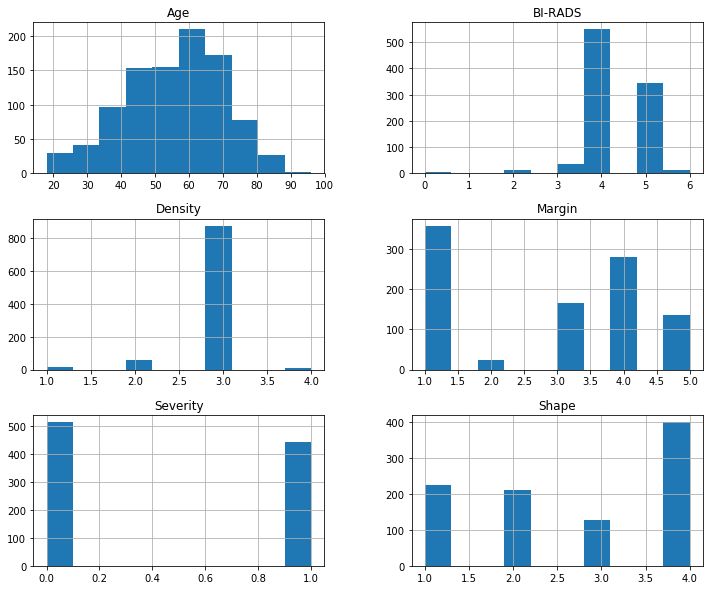

In [52]:
#Hist 
imputed_df.hist(figsize=(12,10))

BI-RADS        Axes(0.125,0.657941;0.227941x0.222059)
Age         Axes(0.398529,0.657941;0.227941x0.222059)
Shape       Axes(0.672059,0.657941;0.227941x0.222059)
Margin         Axes(0.125,0.391471;0.227941x0.222059)
Density     Axes(0.398529,0.391471;0.227941x0.222059)
Severity    Axes(0.672059,0.391471;0.227941x0.222059)
dtype: object

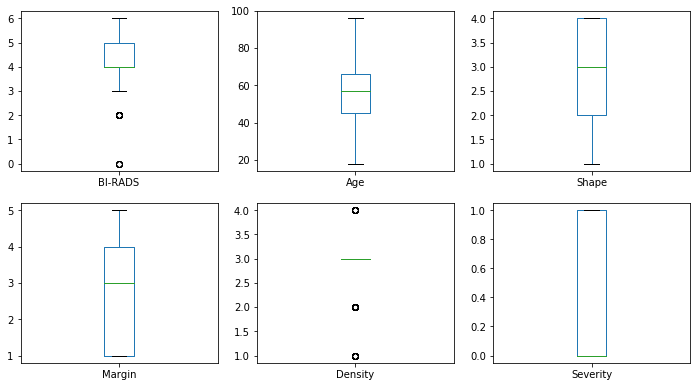

In [53]:
#boxplot
imputed_df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,10))

In [54]:
imputed_df.corr()

,BI-RADS,Age,Shape,Margin,Density,Severity
BI-RADS,1.000000,0.287635,0.383086,0.397135,0.074020,0.504444
Age,0.287635,1.000000,0.360532,0.402995,0.021119,0.431329
Shape,0.383086,0.360532,1.000000,0.718893,0.057495,0.552781
Margin,0.397135,0.402995,0.718893,1.000000,0.094516,0.557867
Density,0.074020,0.021119,0.057495,0.094516,1.000000,0.054681
Severity,0.504444,0.431329,0.552781,0.557867,0.054681,1.000000


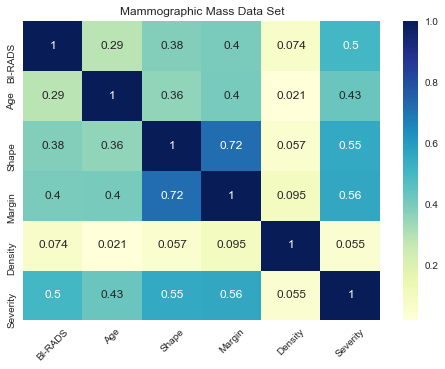

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = imputed_df.corr()
ax = sns.heatmap(corr, annot = True, cmap="YlGnBu")

plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.rcParams['figure.figsize']=(8,4)
plt.title('Mammographic Mass Data Set')

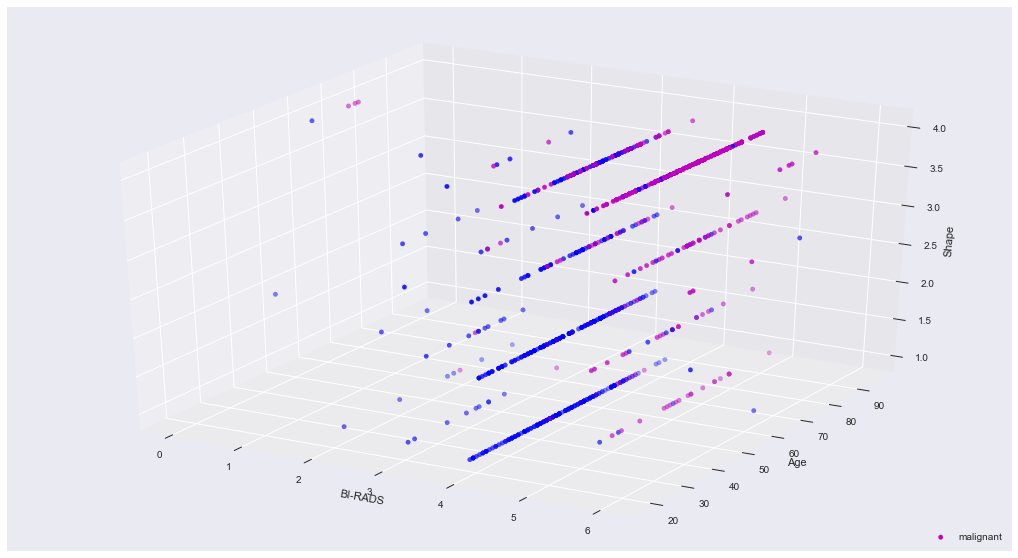

In [56]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

feature1 = imputed_df['BI-RADS'].values
feature2 = imputed_df['Age'].values 
feature3 = imputed_df['Shape'].values

imputed_df['Severity']=imputed_df['Severity'].astype('str')

c = imputed_df['Severity'].values
imputed_df['Severity']=imputed_df['Severity'].astype('int')
c[c=='0'] = 'b' #negative diagnosis cancer
c[c=='1'] = 'm' #positive diagnosis cancer

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=c, label='malignant')
ax.set_xlabel('BI-RADS')
ax.set_ylabel('Age')
ax.set_zlabel('Shape')
ax.legend(loc="lower right")

plt.show()

### Decision tree  
1.	supervised learning on training data 
2.	optimization of hyper-parameters 
3.	model evaluation including but not limited to criteria such as confusion matrix, precision, recall, F1, and AUC 

### - Feature selection (imp data)  
#### Best feature:   'Age', 'Shape', 'Margin'

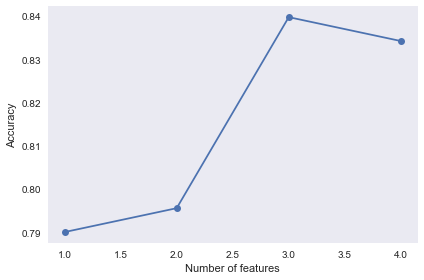

[0.83425414364640882, 0.83977900552486184, 0.79558011049723754, 0.79005524861878451]


In [57]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


dt = DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=42)

# selecting features
sbs = SBS(dt, k_features=1)
sbs.fit(X_imp_train, Y_imp_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()
print(sbs.scores_)

In [58]:
sbs.subsets_

[(0, 1, 2, 3), (0, 1, 2), (1, 2), (2,)]

In [61]:
#what are those features that yielded such a good performance
k5=list(sbs.subsets_[1])
k5

[0, 1, 2]

In [63]:
feature_labels = imputed_df.columns[1:5]
feature_labels[k5]

Index(['Age', 'Shape', 'Margin'], dtype='object')

In [64]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

### Training Decision tree (impute)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### -Split data
x_train_sel, x_test_sel, Y_imp_train(Y_train_sel), Y_imp_test(Y_test_sel). 

In [119]:
x_train_sel = X_imp_train[:,0:3]
x_train_sel.shape

(722, 3)

In [121]:
x_test_sel = X_imp_test[:,0:3]
x_test_sel.shape

(310, 3)

In [122]:
Y_test_sel = Y_imp_test
Y_train_sel= Y_imp_train 

In [123]:
# Use a random 70-30 split of data for training and testing resp. with complete dataset
print ("number of instances for training: ", len(Y_train_sel))
print ("number of instances for test: ", len(Y_test_sel))

number of instances for training:  722
number of instances for test:  310


In [124]:
!pip install pydotplus

In [125]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /Users/richardtsai/anaconda/lib/python3.6/site-packages (10.0.1)


In [126]:
! pip install graphviz

### -Grid Search for best parameters (Decision tree)

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth': np.arange(1, 10),'criterion': ['gini']},{'max_depth': np.arange(1, 5),'criterion': ['entropy']}]

tree = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, scoring='accuracy',cv=10)

tree.fit(x_train_sel, Y_train_sel)
print(tree.best_score_)
print(tree.best_params_)


0.813019390582
{'criterion': 'gini', 'max_depth': 4}


In [128]:
# Predict values using the testing data
# for validation
clf_dt_final = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
clf_dt_final.fit(x_train_sel, Y_train_sel)
dt_predict_test = clf_dt_final.predict(x_test_sel)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test_sel, dt_predict_test)))


Accuracy: 0.7968


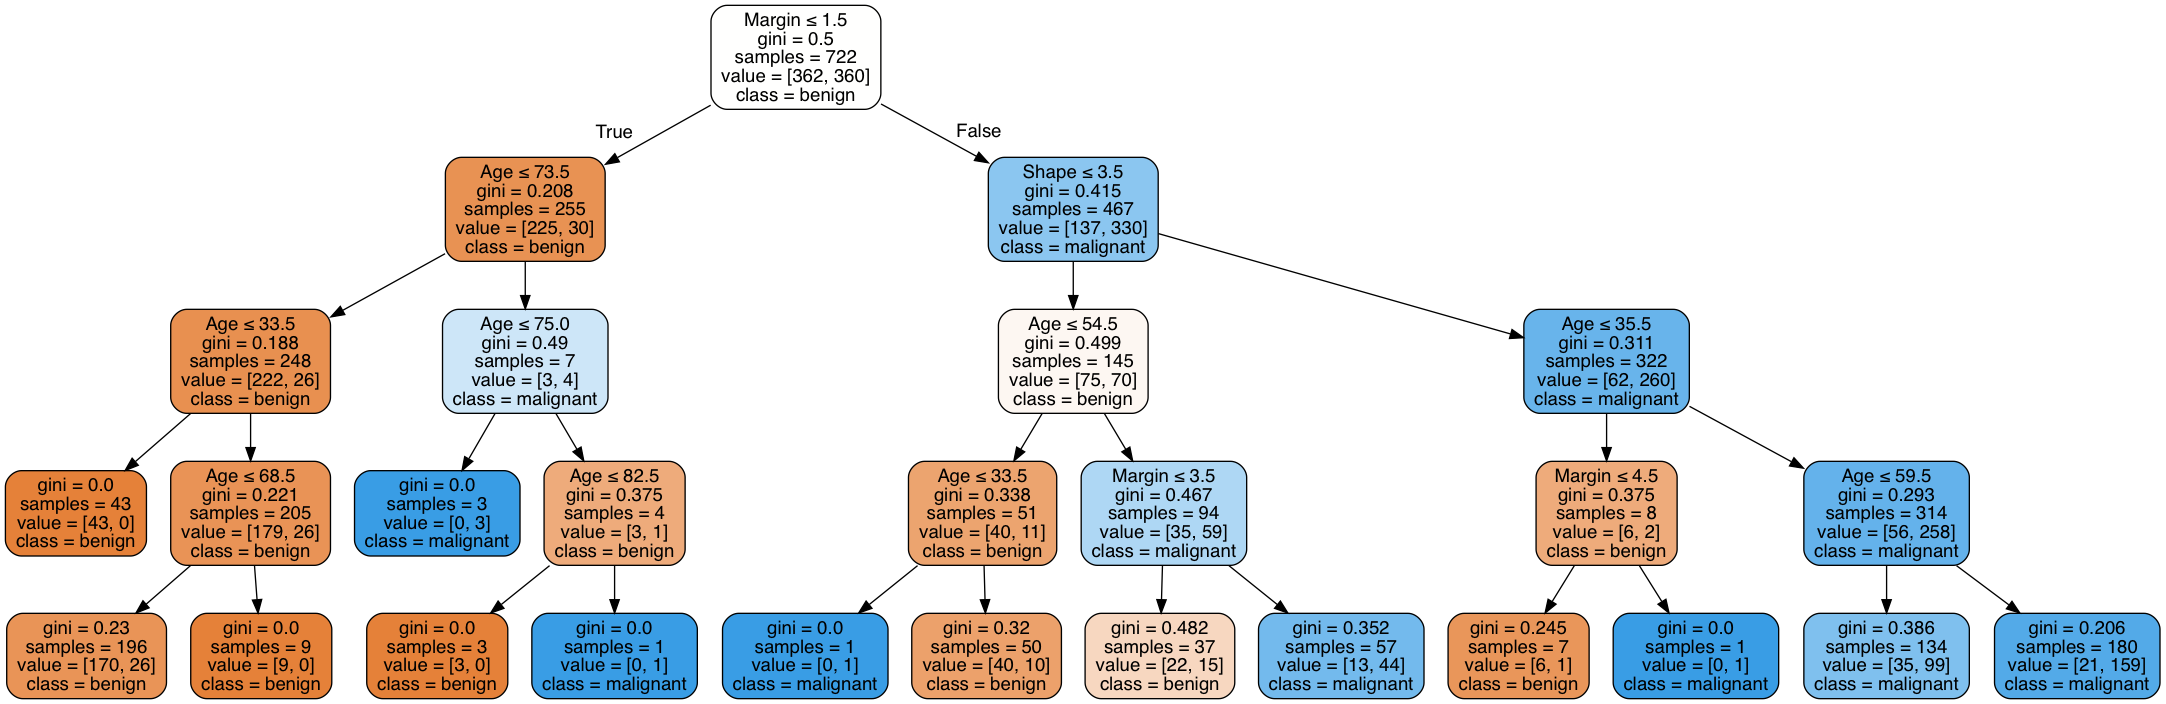

In [129]:
import graphviz 
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
dot_data=StringIO()
cols_name=['Age','Shape','Margin']
dot_data = export_graphviz(clf_dt_final, out_file = None, feature_names=cols_name, class_names=['benign', 'malignant'], 
                filled=True, rounded=True, special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
#print(dot_data)
Image(graph.create_png())

### -Scores for decision tree

In [130]:
# final model
clf_dt_final = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
clf_dt_final.fit(x_train_sel, Y_train_sel)
Y_pred = clf_dt_final.predict(x_test_sel)

In [131]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, accuracy_score
print('Precision: %.3f' % precision_score(y_true=Y_test_sel, y_pred=Y_pred))
print('Recall: %.3f'       % recall_score(y_true=Y_test_sel, y_pred=Y_pred))
print('F1: %.3f'               % f1_score(y_true=Y_test_sel, y_pred=Y_pred))
print('Accuracy: %.3f'   % accuracy_score(y_true=Y_test_sel, y_pred=Y_pred))
print('ROC AUC: %.3f'     % roc_auc_score(y_true=Y_test_sel, y_score=Y_pred))

Precision: 0.800
Recall: 0.795
F1: 0.797
Accuracy: 0.797
ROC AUC: 0.797


In [90]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(Y_test_sel, Y_pred, labels=[1, 0])))

Confusion Matrix
[[128  28]
 [ 31 123]]


### Support vector machine 
1.	supervised learning on training data 
2.	optimization of hyper-parameters 
3.	model evaluation including but not limited to criteria such as confusion matrix, precision, recall, F1, and AUC 

Datasets: 
X_train_impsvmsel, X_test_impsvmsel, Y_train_impsvmsel,Y_test_impsvmsel. 

### -Select feature  ( 'Age', 'Shape', 'Margin')

In [96]:
X_train_impsvmsel= X_imp_train_std[:,0:3]
X_test_impsvmsel= X_imp_test_std[:,0:3]
Y_train_impsvmsel= Y_imp_train
Y_test_impsvmsel= Y_imp_test

In [97]:
# Use a random 70-30 split of data for training and testing resp. with complete dataset
print ("number of instances for training: ", len(Y_train_impsvmsel))
print ("number of instances for test: ", len(Y_test_impsvmsel))

number of instances for training:  722
number of instances for test:  310


### Grid search for best parameters 

In [145]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(random_state=1))])

param_range = [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range, 
               'clf__kernel': ['linear']},
                 {'clf__C': param_range, 
                  'clf__gamma': param_range, 
                  'clf__kernel': ['rbf']}]
scoring = 'accuracy'
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring=scoring, 
                  cv=10)
gs = gs.fit(X_train_impsvmsel, Y_train_impsvmsel)
print(gs.best_score_)
print(gs.best_params_)

0.817174515235457
{'clf__C': 100.0, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}


### Validation for SVM model

In [109]:
model_SVM_IMP = SVC(kernel='rbf', C=100, gamma=0.1)
model_SVM_IMP.fit(X_train_impsvmsel,Y_train_impsvmsel)
Y_pred = model_SVM_IMP.predict(X_test_impsvmsel)

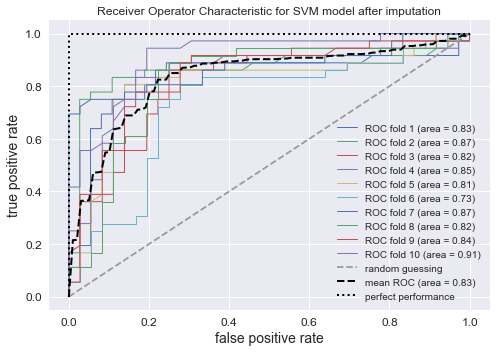

In [114]:
### ROC area
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.cross_validation import StratifiedKFold

pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(kernel='rbf', C=100, gamma=0.1, probability=True))])

cv = StratifiedKFold(Y_train_impsvmsel, n_folds=10, random_state=1)

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_svc.fit(X_train_impsvmsel[train],Y_train_impsvmsel[train]).predict_proba(X_train_impsvmsel[test])
    
    fpr, tpr, thresholds = roc_curve(Y_train_impsvmsel[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label='ROC fold %d (area = %0.2f)' 
                    % (i+1, roc_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic for SVM model after imputation')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [115]:
#Scaling 
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_impsvmstd = stdsc.fit_transform(X_train_impsvmsel)
X_test_impsvmstd = stdsc.transform(X_test_impsvmsel)

In [116]:
# Model 
pipe_svc_model = pipe_svc.fit(X_train_impsvmstd,Y_train_impsvmsel)
Y_pred = pipe_svc_model.predict(X_test_impsvmstd)

In [117]:
# SCORES
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, accuracy_score
print('Precision: %.3f' % precision_score(y_true=Y_test_impsvmsel, y_pred=Y_pred))
print('Recall: %.3f'       % recall_score(y_true=Y_test_impsvmsel, y_pred=Y_pred))
print('F1: %.3f'               % f1_score(y_true=Y_test_impsvmsel, y_pred=Y_pred))
print('Accuracy: %.3f'   % accuracy_score(y_true=Y_test_impsvmsel, y_pred=Y_pred))
print('ROC AUC: %.3f'     % roc_auc_score(y_true=Y_test_impsvmsel, y_score=Y_pred))

Precision: 0.816
Recall: 0.827
F1: 0.822
Accuracy: 0.819
ROC AUC: 0.819


In [105]:
# eliminate warnings 
import warnings
warnings.filterwarnings("ignore")

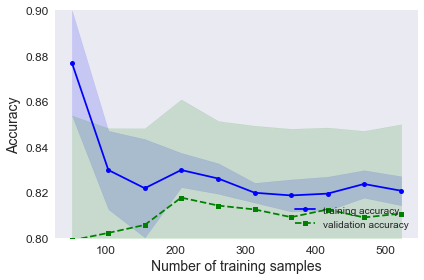

In [106]:
from sklearn.learning_curve import learning_curve
from sklearn.pipeline import Pipeline
%matplotlib inline


pipe_svc = Pipeline([('scl', StandardScaler()),('clf', SVC())])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_svc, 
                X=X_train, 
                y=Y_train, 
                train_sizes=np.linspace(0.1, 1.0, 10), 
                cv=10,
                n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 0.9])
plt.tight_layout()
plt.show()

### Compare Result of   SVM/  Decision Tree / Dummy 

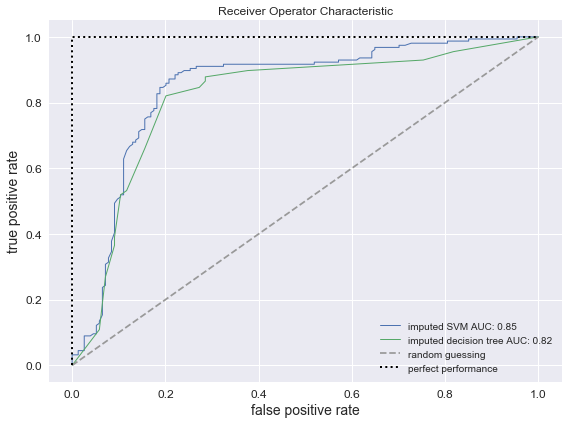

In [118]:
fig = plt.figure(figsize=(8, 6))



pipe_svc_model.fit(X_train_impsvmstd,Y_train_impsvmsel)
probas = pipe_svc_model.predict_proba(X_test_impsvmstd)
fpr, tpr, thresholds = roc_curve(Y_test_impsvmsel, probas[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
current_auc = str('%.2f' %roc_auc)
plt.plot(fpr, tpr, lw=1, 
         label= str('imputed SVM' + ' AUC: ' + current_auc))


clf_dt_final.fit(x_train_sel, Y_train_sel)
probas = clf_dt_final.predict_proba(x_test_sel)
fpr, tpr, thresholds = roc_curve(Y_test_sel, probas[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
current_auc = str('%.2f' %roc_auc)
plt.plot(fpr, tpr, lw=1, 
         label= str('imputed decision tree' + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()